In [72]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from WelfareMeasures import *
from functions_njit import tax_rate_fct
from bernoulli_distribution import Bernoulli
from help_functions_non_njit import *
from graph_format import *
# load local model file and initialize model class
from model import ModelClass
from scipy.optimize import minimize
import pandas as pd
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
df = pd.read_csv('Andet\\andet_data\\total_effect_grid.txt', sep='\s+', header=None)

# Assign column names (optional)
df.columns = ['SPA', 'RPA', 'EPA', 'LS', 'CE']
# df['EPA'] = df['EPA']+df['RPA']
type_dict = {'SPA': int, 'RPA':int, 'EPA':int}
df = df.astype(type_dict)
df[['LS', 'CE']] = df[['LS', 'CE']]*100
df[['SPA', 'RPA']] = df[['SPA', 'RPA']]+30

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\B224264\AppData\Local\Temp\ipykernel_12332\1747222296.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('Andet\\andet_data\\total_effect_grid.txt', sep='\s+', header=None)


In [74]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Brighter green-white-red transition
green_red = mcolors.LinearSegmentedColormap.from_list(
    "GreenRedBright", ["#BF616A","#EBCB8B", "#A3BE8C"]
)


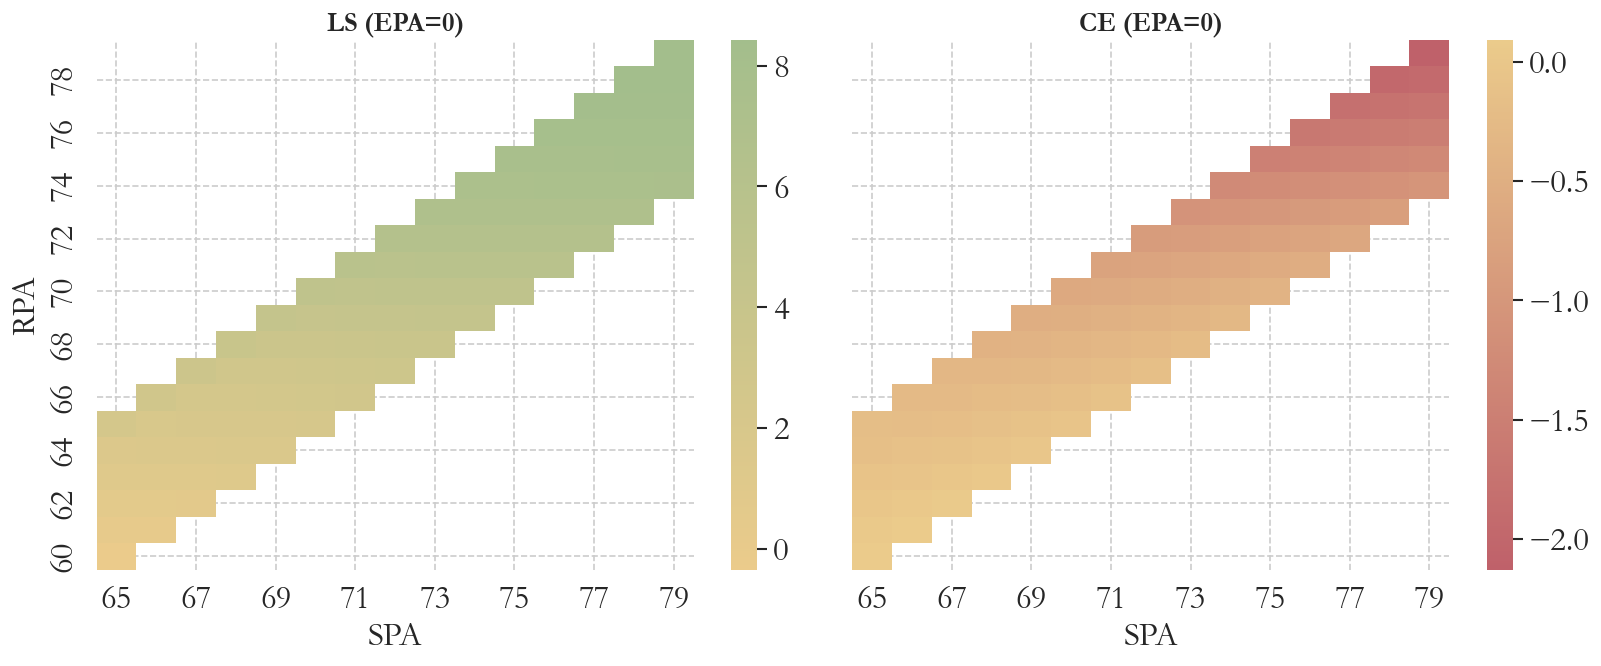

In [75]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

# Brighter green-white-red transition
yellow_red = mcolors.LinearSegmentedColormap.from_list(
    "GreenRedBright", ["#EBCB8B", "#A3BE8C"]
)
green_yellow = mcolors.LinearSegmentedColormap.from_list(
    "GreenRedBright", ["#BF616A","#EBCB8B"]
)

# Fixed EPA value
fixed_epa = 0
subset = df[df['EPA'] == fixed_epa]

# Pivot data
pivot_ls = subset.pivot(index='RPA', columns='SPA', values='LS')
pivot_ce = subset.pivot(index='RPA', columns='SPA', values='CE')

# Side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.heatmap(pivot_ls, cmap=yellow_red, annot=False, ax=axes[0], cbar=True)
axes[0].invert_yaxis()
axes[0].set_title(f"LS (EPA={fixed_epa})")
axes[0].set_xlabel("SPA")
axes[0].set_ylabel("RPA")

sns.heatmap(pivot_ce, cmap=green_yellow, annot=False, ax=axes[1], cbar=True)
axes[1].invert_yaxis()
axes[1].set_title(f"CE (EPA={fixed_epa})")
axes[1].set_xlabel("SPA")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


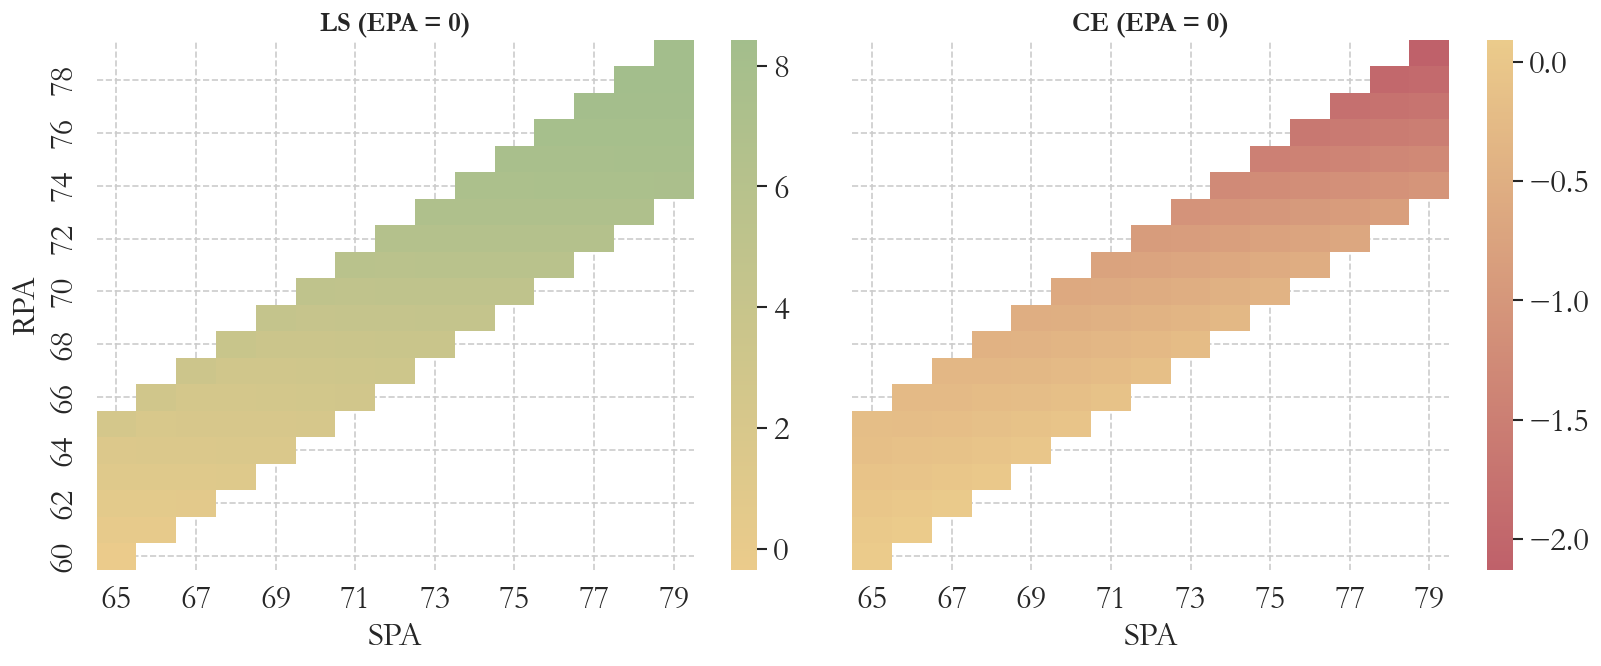

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# --- Custom vivid colormaps ---
yellow_red = mcolors.LinearSegmentedColormap.from_list("YellowToGreen", ["#EBCB8B", "#A3BE8C"])
green_yellow = mcolors.LinearSegmentedColormap.from_list("RedToYellow", ["#BF616A", "#EBCB8B"])

# --- Subset for EPA = 0 ---
fixed_epa = 0
subset = df[df['EPA'] == fixed_epa]

# Pivot values
pivot_ls = subset.pivot(index='RPA', columns='SPA', values='LS')
pivot_ce = subset.pivot(index='RPA', columns='SPA', values='CE')

# --- Create figure and axes ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# LS Heatmap
sns.heatmap(pivot_ls, cmap=yellow_red, ax=axes[0], annot=False, cbar=True)
axes[0].invert_yaxis()
axes[0].set_title(f"LS (EPA = {fixed_epa})", fontweight="bold")
axes[0].set_xlabel("SPA")
axes[0].set_ylabel("RPA")

# CE Heatmap
sns.heatmap(pivot_ce, cmap=green_yellow, ax=axes[1], annot=False, cbar=True)
axes[1].invert_yaxis()
axes[1].set_title(f"CE (EPA = {fixed_epa})", fontweight="bold")
axes[1].set_xlabel("SPA")
axes[1].set_ylabel("")

# Layout
plt.tight_layout()
plt.show()


In [77]:
for i in df.RPA.unique():
    df_RPA = df[df['RPA'] == i]


C:\Users\B224264\AppData\Local\Temp\ipykernel_12332\2865713012.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='SPA', bbox_to_anchor=(1.05, 1), loc='upper left')


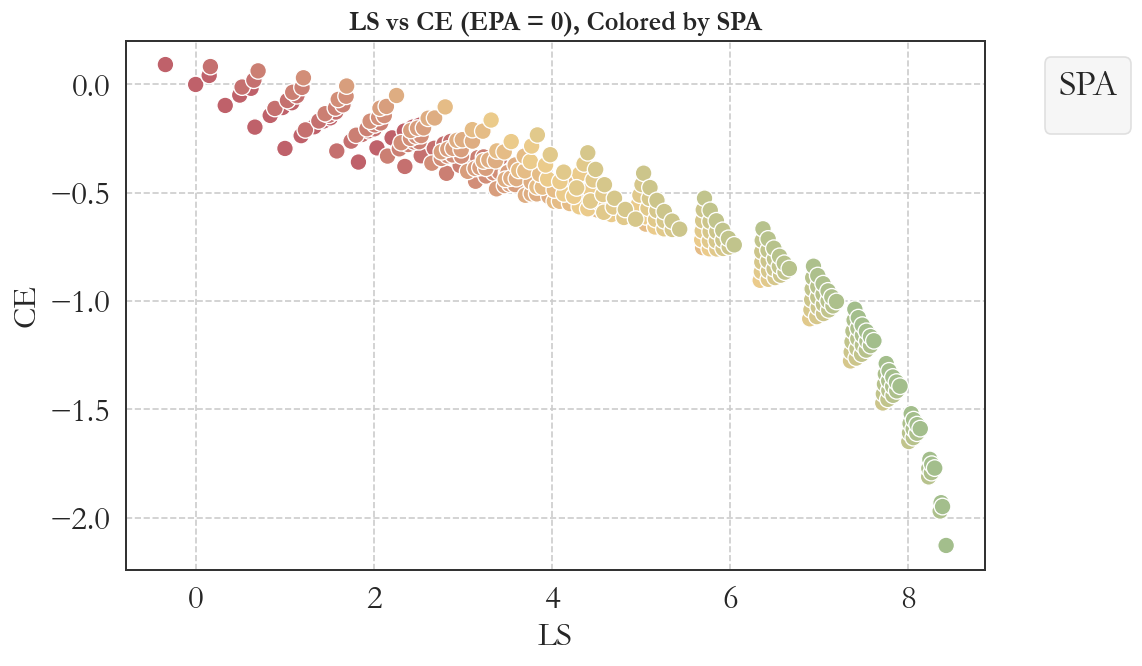

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
unique_rpa = sorted(df['RPA'].unique())



plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='LS', y='CE', hue='SPA',
                palette=green_red, s=100, legend=False)  # Avoid duplicate legends

plt.title('LS vs CE (EPA = 0), Colored by SPA')
plt.xlabel('LS')
plt.ylabel('CE')
plt.legend(title='SPA', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\B224264\AppData\Local\Temp\ipykernel_12332\4035612489.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='SPA', bbox_to_anchor=(1.05, 1), loc='upper left')


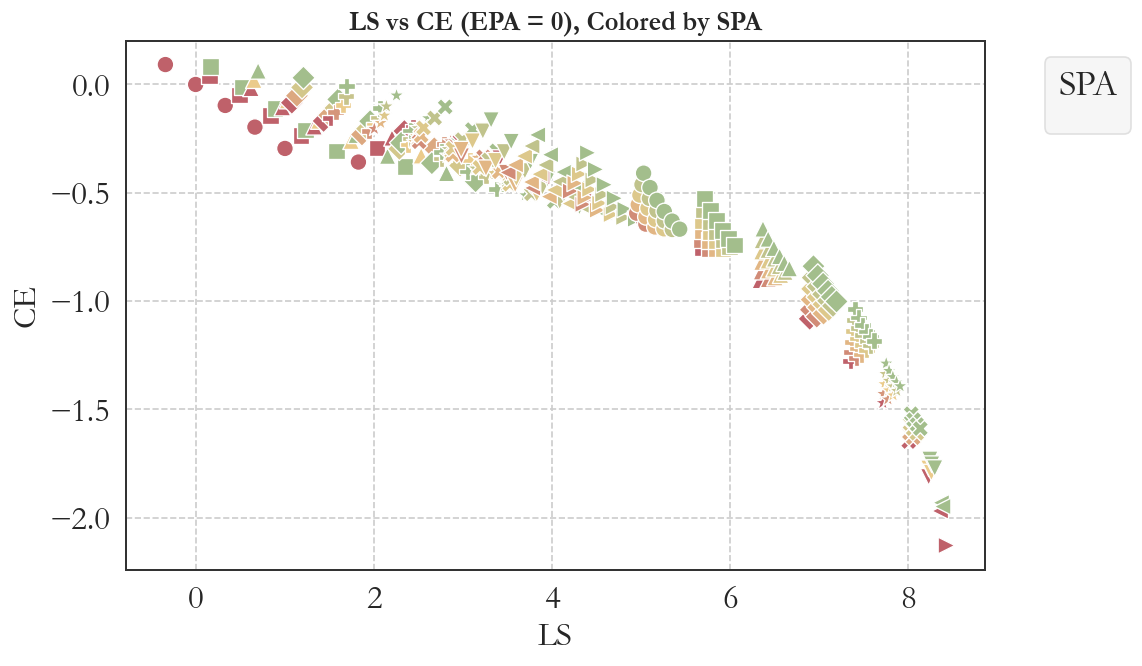

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
unique_rpa = sorted(df['RPA'].unique())

markers = ['o', 's', '^', 'D', 'P', '*', 'X', 'v', '<', '>']  # Extend if needed


plt.figure(figsize=(10, 6))

for i, rpa in enumerate(unique_rpa):
    df_rpa = df[df['RPA'] == rpa]
    sns.scatterplot(data=df_rpa, x='LS', y='CE', hue='SPA',
                    palette=green_red, s=100, marker=markers[i % len(markers)],
                    legend=False)  # Avoid duplicate legends

plt.title('LS vs CE (EPA = 0), Colored by SPA')
plt.xlabel('LS')
plt.ylabel('CE')
plt.legend(title='SPA', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [80]:
df_epa = pd.read_csv('Andet\\andet_data\\total_effect_grid.txt', sep='\s+', header=None)

# Assign column names (optional)
df_epa.columns = ['SPA', 'RPA', 'EPA', 'LS', 'CE']
df_epa['EPA'] = df_epa['EPA']+df_epa['RPA']
type_dict = {'SPA': int, 'RPA':int, 'EPA':int}
df_epa = df_epa.astype(type_dict)
df_epa[['LS', 'CE']] = df_epa[['LS', 'CE']]*100

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\B224264\AppData\Local\Temp\ipykernel_12332\2058038709.py:1: SyntaxWarning: invalid escape sequence '\s'
  df_epa = pd.read_csv('Andet\\andet_data\\total_effect_grid.txt', sep='\s+', header=None)


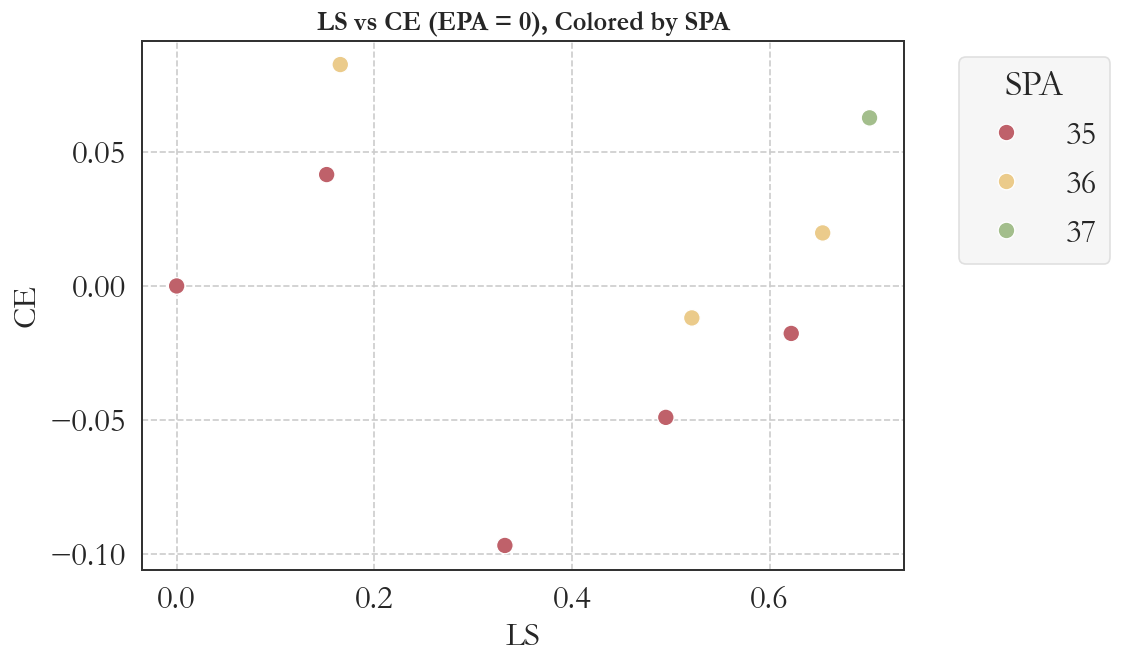

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

t = 31
temp_sub = df_epa[((df_epa['EPA']==t) | (df_epa['EPA']==t+1))]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=temp_sub, x='LS', y='CE', hue='SPA', palette=green_red, s=100)

plt.title('LS vs CE (EPA = 0), Colored by SPA')
plt.xlabel('LS')
plt.ylabel('CE')
plt.legend(title='SPA', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

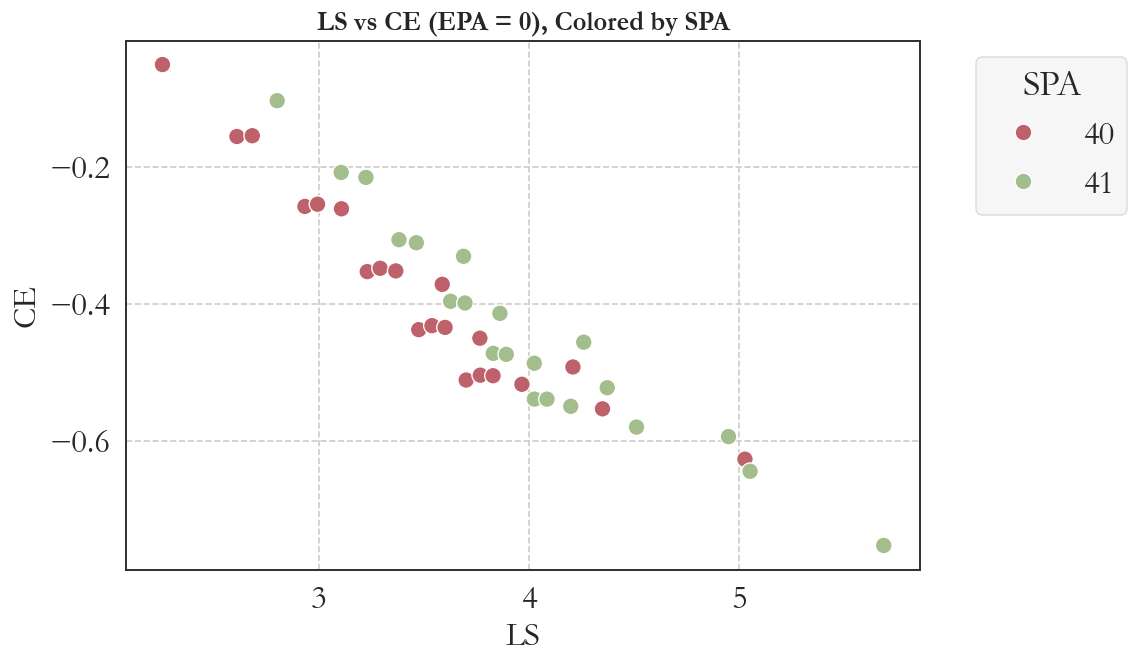

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

t = 40

temp_sub = df_epa[((df_epa['SPA']==t) | (df_epa['SPA']==t+1))]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=temp_sub, x='LS', y='CE', hue='SPA', palette=green_red, s=100)

plt.title('LS vs CE (EPA = 0), Colored by SPA')
plt.xlabel('LS')
plt.ylabel('CE')
plt.legend(title='SPA', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

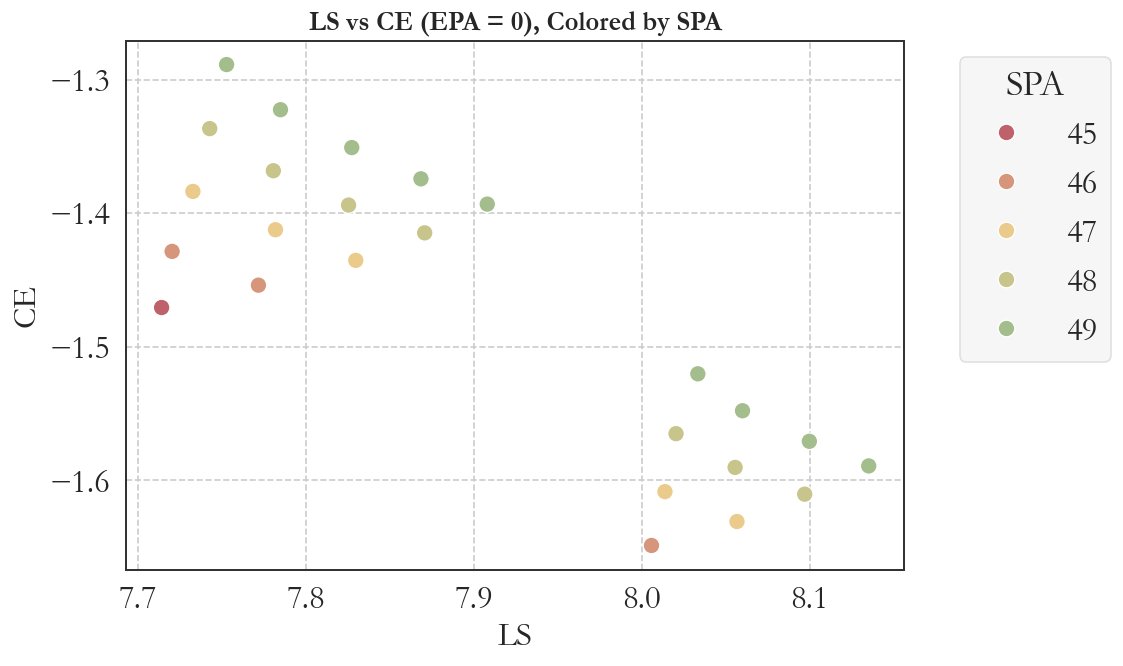

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

t= 45
temp_sub = df_epa[((df_epa['RPA']==t) | (df_epa['RPA']==t+1))]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=temp_sub, x='LS', y='CE', hue='SPA', palette=green_red, s=100)

plt.title('LS vs CE (EPA = 0), Colored by SPA')
plt.xlabel('LS')
plt.ylabel('CE')
plt.legend(title='SPA', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Relative change in LS

In [12]:
model = ModelClass() # set a few number of periods.

par = model.par
sol = model.sol
sim = model.sim
par.opt_tol = 1e-6
par.opt_maxiter = 1000

%time model.solve(do_print=False)
%time model.simulate()

c:\Design_retirement\model.py:129: RuntimeWarning: divide by zero encountered in scalar divide
  (par.r_s * (1 + par.r_s)**par.EL[int(r)]) / ((1 + par.r_s)**par.EL[int(r)] - 1)


CPU times: total: 12min 9s
Wall time: 4min 5s
CPU times: total: 22 s
Wall time: 33.2 s


In [84]:
pi_cum = np.cumprod(par.pi)
total_margin_og = np.mean(pi_cum[:model.par.last_retirement] * model.sim.h[:, :model.par.last_retirement])

In [85]:
df_ny = pd.read_csv('Andet\\andet_data\\total_effect_grid.txt', sep='\s+', header=None)

# Assign column names (optional)
df_ny.columns = ['SPA', 'RPA', 'EPA', 'LS', 'CE']
# df['EPA'] = df['EPA']+df['RPA']
type_dict = {'SPA': int, 'RPA':int, 'EPA':int}
df_ny = df_ny.astype(type_dict)
df_ny[['LS', 'CE']] = df_ny[['LS', 'CE']]*100
df_ny[['SPA', 'RPA']] = df_ny[['SPA', 'RPA']]+30
df_ny['LS_relativ'] =df_ny['LS'] /total_margin_og

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\B224264\AppData\Local\Temp\ipykernel_12332\3014799569.py:1: SyntaxWarning: invalid escape sequence '\s'
  df_ny = pd.read_csv('Andet\\andet_data\\total_effect_grid.txt', sep='\s+', header=None)


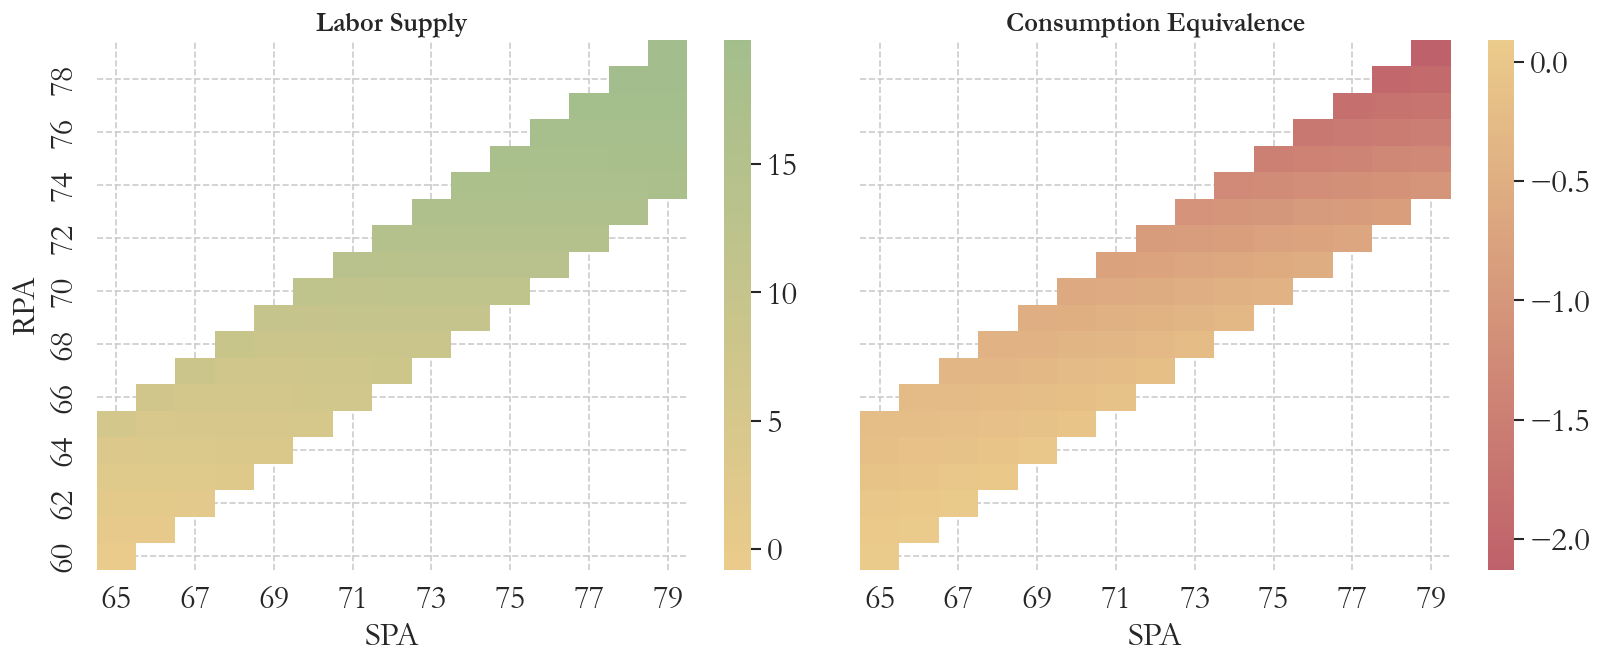

In [86]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

# Brighter green-white-red transition
yellow_red = mcolors.LinearSegmentedColormap.from_list(
    "GreenRedBright", ["#EBCB8B", "#A3BE8C"]
)
green_yellow = mcolors.LinearSegmentedColormap.from_list(
    "GreenRedBright", ["#BF616A","#EBCB8B"]
)

# Fixed EPA value
fixed_epa = 0
subset = df_ny[df_ny['EPA'] == fixed_epa]

# Pivot data
pivot_ls = subset.pivot(index='RPA', columns='SPA', values='LS_relativ')
pivot_ce = subset.pivot(index='RPA', columns='SPA', values='CE')

# Side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.heatmap(pivot_ls, cmap=yellow_red, annot=False, ax=axes[0], cbar=True)
axes[0].invert_yaxis()
axes[0].set_title(f"Labor Supply")
axes[0].set_xlabel("SPA")
axes[0].set_ylabel("RPA")

sns.heatmap(pivot_ce, cmap=green_yellow, annot=False, ax=axes[1], cbar=True)
axes[1].invert_yaxis()
axes[1].set_title(f"Consumption Equivalence")
axes[1].set_xlabel("SPA")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()
save_figure(fig, "CF_policy_space_heatmap.png")


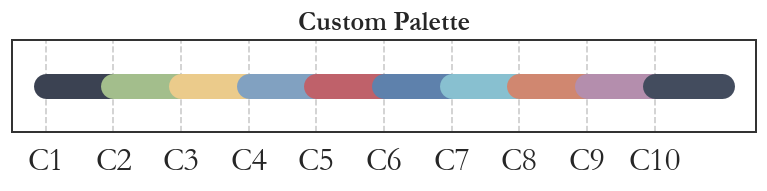

In [87]:
import matplotlib.pyplot as plt

custom_palette = [
    "#3B4252", "#A3BE8C", "#EBCB8B", "#81A1C1", "#BF616A",
    "#5E81AC", "#88C0D0", "#D08770", "#B48EAD", "#434C5E"
]

# Plot each color as a swatch
plt.figure(figsize=(8, 1))
for i, color in enumerate(custom_palette):
    plt.plot([i, i+1], [0, 0], color=color, linewidth=15)

plt.xticks(range(len(custom_palette)), labels=[f'C{i+1}' for i in range(len(custom_palette))])
plt.yticks([])
plt.title('Custom Palette')
plt.show()


In [108]:
df_temp = df_ny
# df_temp['EPA'] = df_temp['RPA'] + df_temp['EPA']
df_temp = df_temp[df_temp['EPA']>df_temp['RPA']]

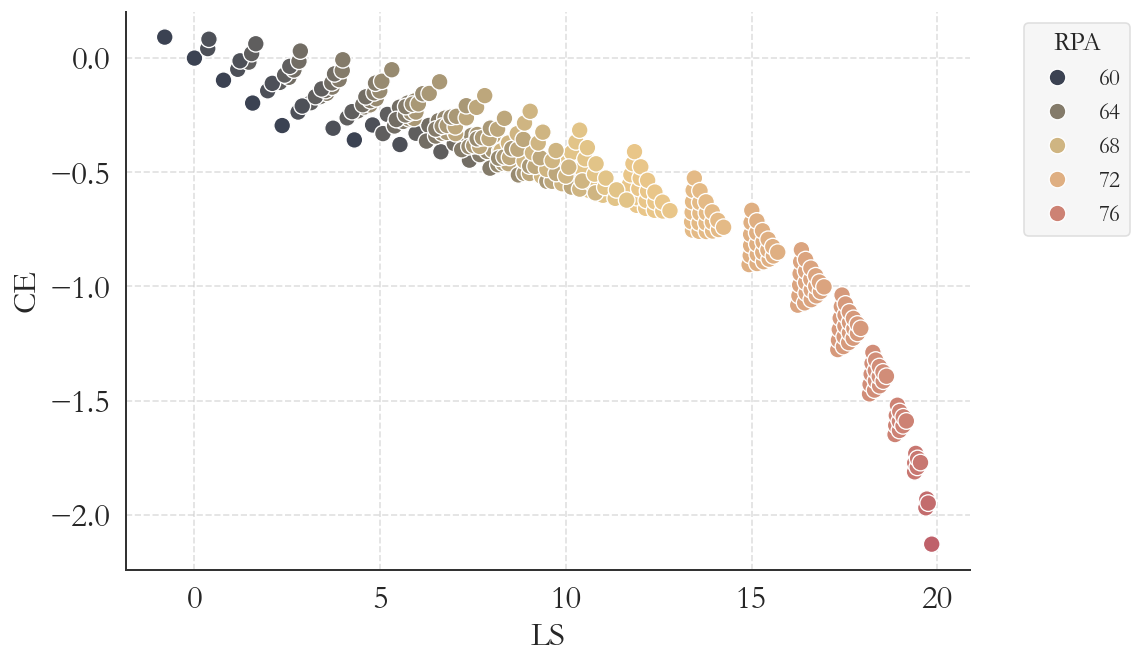

In [109]:
fig, ax = plt.subplots(figsize=(10, 6))



# Brighter green-white-red transition
black_red = mcolors.LinearSegmentedColormap.from_list(
    "GreenRedBright", ["#3B4252","#EBCB8B", "#BF616A"]
)



# --- Scatter plot ---
sns.scatterplot(
    data=df_ny,
    x='LS_relativ',
    y='CE',
    hue='RPA',
    palette=black_red,
    s=100,
    legend=True,
    ax=ax
)

# --- Formatting consistent with graph_format.py ---
ax.set_xlabel('LS', fontsize=20, fontweight='medium')
ax.set_ylabel('CE', fontsize=20, fontweight='medium')
ax.grid(True, linestyle='--', alpha=0.6)
ax.tick_params(axis='both', labelsize=20)

# --- Remove top/right spines (box edges) ---
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# --- Legend formatting ---
ax.legend(
    title='RPA',
    title_fontsize=16,
    fontsize=14,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=True,
    facecolor='#f5f5f5',
    edgecolor='#dddddd'
)

plt.tight_layout()
plt.show()
save_figure(fig, "CF_policy_space_LS_CE_RPA_cluster.png")


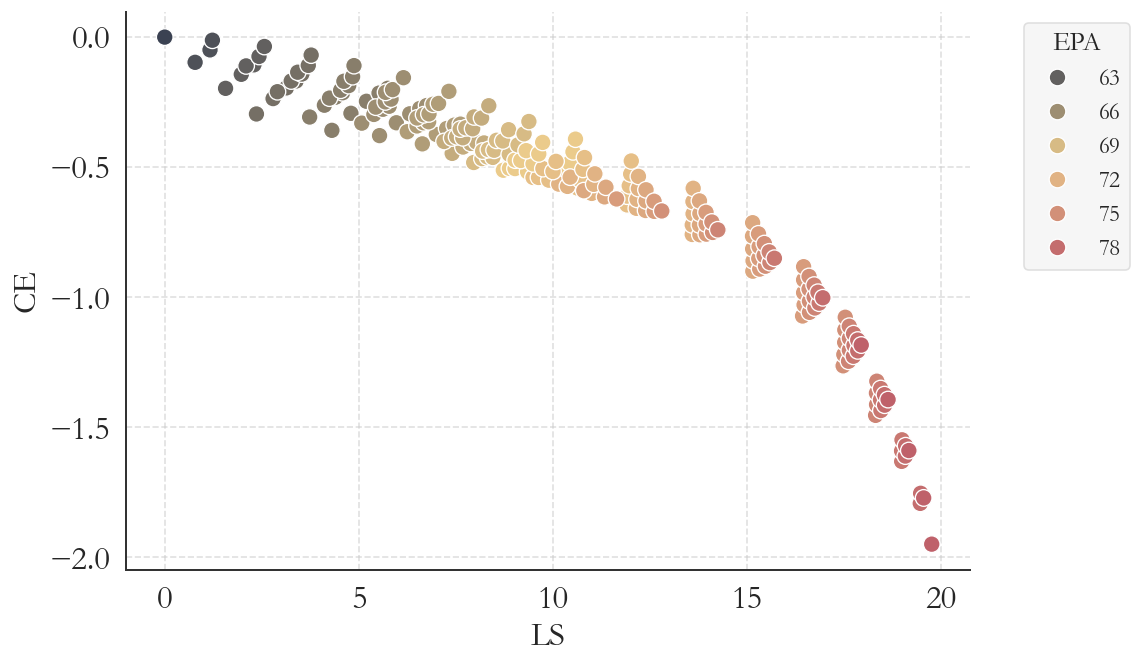

In [110]:
fig, ax = plt.subplots(figsize=(10, 6))

# --- Scatter plot ---
sns.scatterplot(
    data=df_temp,
    x='LS_relativ',
    y='CE',
    hue='EPA',
    palette=black_red,
    s=100,
    legend=True,
    ax=ax
)

# --- Formatting consistent with graph_format.py ---
ax.set_xlabel('LS', fontsize=20, fontweight='medium')
ax.set_ylabel('CE', fontsize=20, fontweight='medium')
ax.grid(True, linestyle='--', alpha=0.6)
ax.tick_params(axis='both', labelsize=20)

# --- Remove top/right spines (box edges) ---
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# --- Legend formatting ---
ax.legend(
    title='EPA',
    title_fontsize=16,
    fontsize=14,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=True,
    facecolor='#f5f5f5',
    edgecolor='#dddddd'
)

plt.tight_layout()
plt.show()
save_figure(fig, "CF_policy_space_LS_CE_EPA_cluster.png")


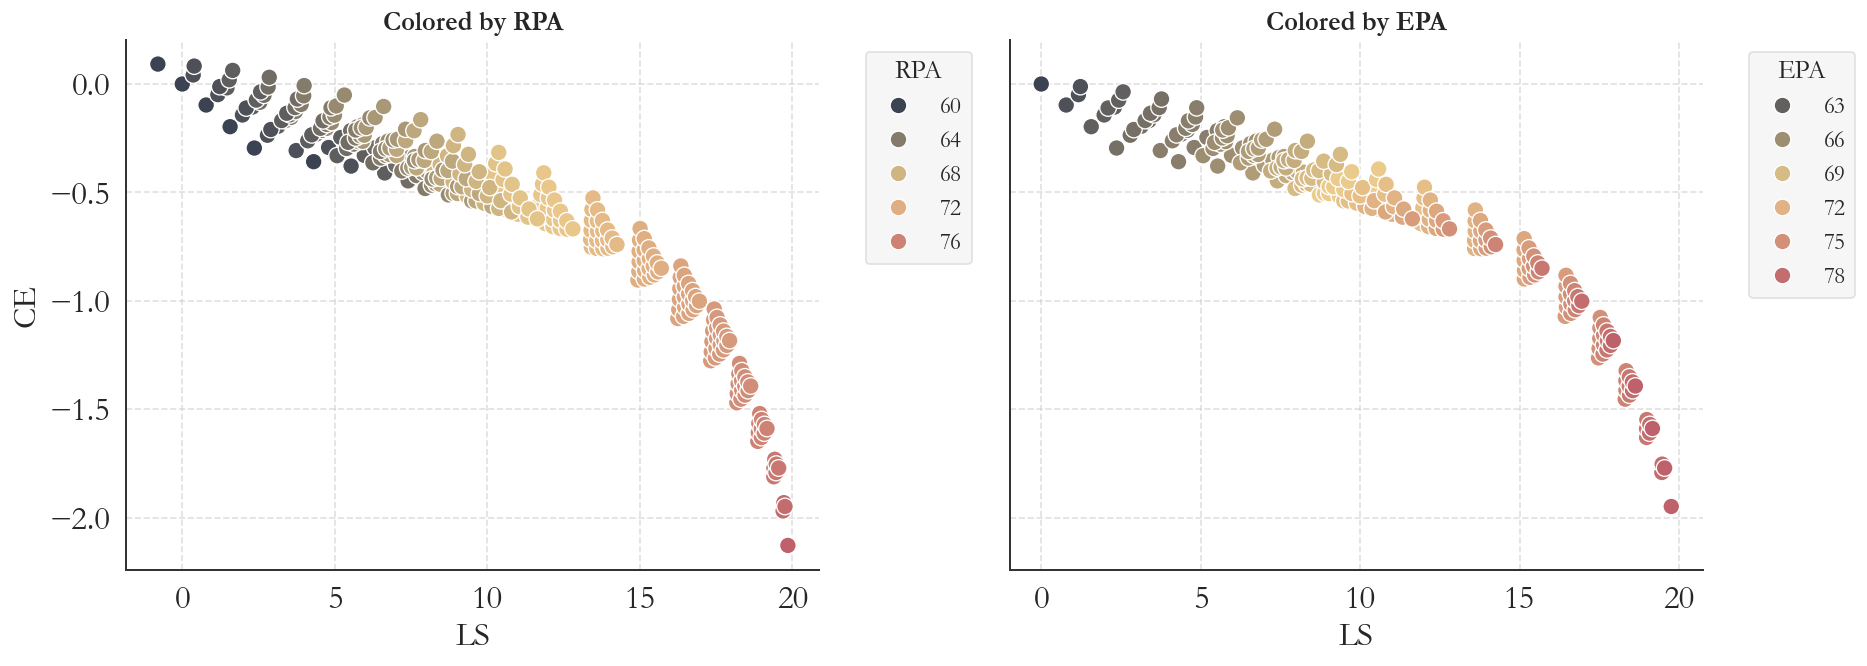

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# --- Custom colormap ---
black_red = mcolors.LinearSegmentedColormap.from_list(
    "GreenRedBright", ["#3B4252", "#EBCB8B", "#BF616A"]
)

# --- Create subplots ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# --- Plot 1: Colored by RPA ---
sns.scatterplot(
    data=df_ny,
    x='LS_relativ',
    y='CE',
    hue='RPA',
    palette=black_red,
    s=100,
    legend=True,
    ax=axes[0]
)
axes[0].set_title("Colored by RPA", fontsize=16, fontweight='bold')
axes[0].set_xlabel('LS', fontsize=20, fontweight='medium')
axes[0].set_ylabel('CE', fontsize=20, fontweight='medium')
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].tick_params(axis='both', labelsize=20)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

axes[0].legend(
    title='RPA',
    title_fontsize=16,
    fontsize=14,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=True,
    facecolor='#f5f5f5',
    edgecolor='#dddddd'
)

# --- Plot 2: Colored by EPA ---
sns.scatterplot(
    data=df_temp,
    x='LS_relativ',
    y='CE',
    hue='EPA',
    palette=black_red,
    s=100,
    legend=True,
    ax=axes[1]
)
axes[1].set_title("Colored by EPA", fontsize=16, fontweight='bold')
axes[1].set_xlabel('LS', fontsize=20, fontweight='medium')
axes[1].set_ylabel('', fontsize=20, fontweight='medium')  # Hide duplicate ylabel
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].tick_params(axis='both', labelsize=20)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

axes[1].legend(
    title='EPA',
    title_fontsize=16,
    fontsize=14,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=True,
    facecolor='#f5f5f5',
    edgecolor='#dddddd'
)

plt.tight_layout()
plt.show()

# Save as one combined figure
save_figure(fig, "CF_policy_space_LS_CE_RPA_EPA_cluster.png")


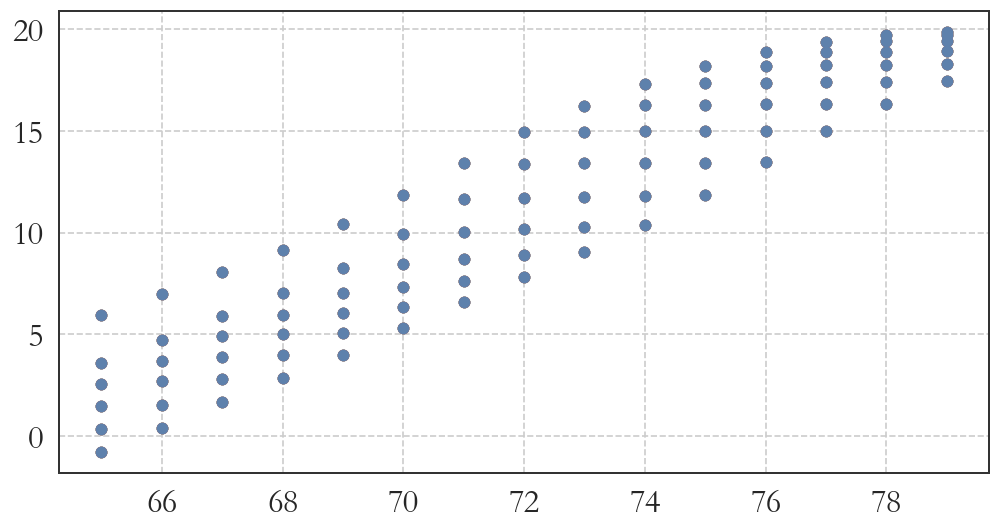

In [56]:
for i in df.EPA.unique():
    data = df_ny[df_ny['EPA']==0]
    plt.scatter(data['SPA'], data['LS_relativ'])
# plt.scatter(data['SPA'], data['CE'])

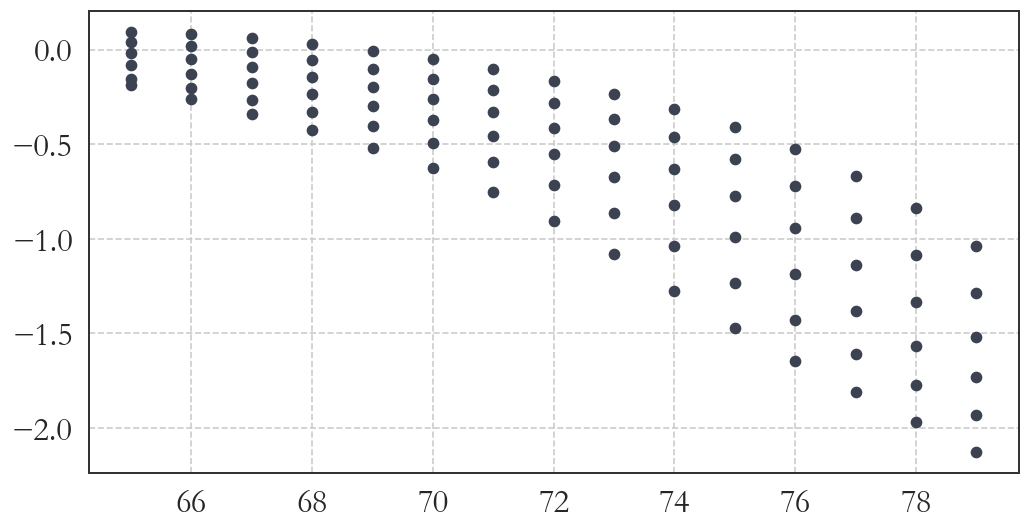

In [30]:
plt.scatter(data['SPA'], data['CE'])